#ANLY590 HW#3


#Yuhui Tang

# Question 1

Build and fit a convolutional autoencoder for the Fashion MNIST dataset.
The components of this network will be many of the same pieces we’ve used
with convolutional classification networks: Conv2D, MaxPooling, and so on.
The encoder part of the network should run the input image through a few
convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.


In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

import matplotlib.pyplot as plt


input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [2]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
        epochs=10,
        batch_size=128,
        shuffle=True,
        validation_data=(x_test, x_test),
        callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])





Train on 60000 samples, validate on 10000 samples







Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.3786 - val_loss: 0.3404

Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3293 - val_loss: 0.3207
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3188 - val_loss: 0.3168
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3134 - val_loss: 0.3127
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3098 - val_loss: 0.3091
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3074 - val_loss: 0.3051
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3053 - val_loss: 0.3051
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3038 - val_loss: 0.3043
Epoch 9/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3026 - val_loss:

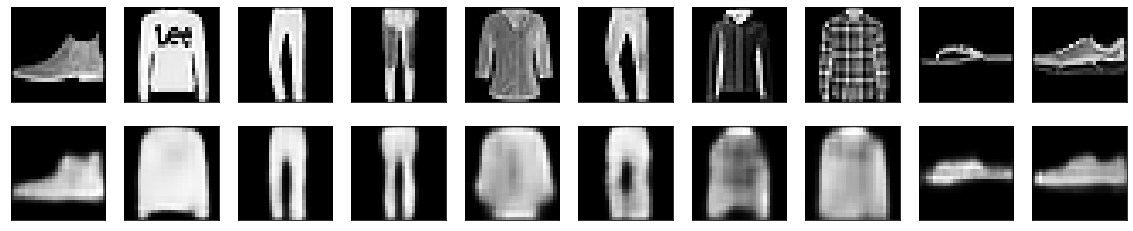

In [5]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Question 2

2.1 Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.

In [0]:
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# import keras tools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# import dataset
from keras.datasets import fashion_mnist

In [0]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Declaring a depth of 1 for MNIST
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
# Setting up the Architecture

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3),activation='relu', strides=(1, 1), padding='valid', input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size=(3, 3),activation='relu', strides=(1, 1), padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=128, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.6768 - acc: 0.7650 - val_loss: 0.3828 - val_acc: 0.8615
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4435 - acc: 0.8443 - val_loss: 0.3259 - val_acc: 0.8817
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3906 - acc: 0.8602 - val_loss: 0.3050 - val_acc: 0.8895
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3596 - acc: 0.8705 - val_loss: 0.2899 - val_acc: 0.8969
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3384 - acc: 0.8791 - val_loss: 0.2784 - val_acc: 0.9015
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.3150 - acc: 0.8857 - val_loss: 0.2658 - val_acc: 0.9072
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3002 - acc: 0.8920 - val_loss: 0.2553 - val_ac

<Figure size 432x288 with 0 Axes>

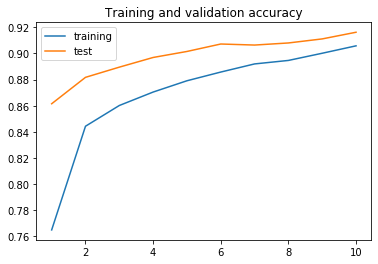

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(range(1,11),model_training.history["acc"],label='training')
plt.plot(range(1,11),model_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'upper left')
plt.figure()

<Figure size 432x288 with 0 Axes>

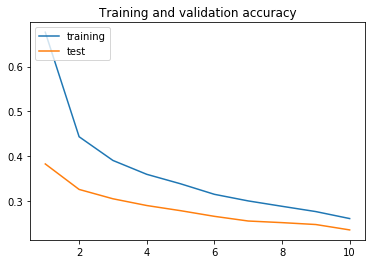

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(range(1,11),model_training.history["loss"],label='training')
plt.plot(range(1,11),model_training.history['val_loss'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'upper left')
plt.figure()

In [0]:
score_train = model.evaluate(X_train, Y_train, verbose=1)
score_test = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 62us/step


In [0]:
print(score_train)
print(score_test)

[0.1664994724775354, 0.9397333333333333]
[0.2416531729221344, 0.911]


#Summary
kernel size = (3,3)  
strides = (1,1)  
padding = 'valid'  
  
training accuracy: 0.9397  
training loss: 0.166  
test accuracy: 0.911 
test loss: 0.241


2.2  Transfer Learning Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.


In [0]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
from keras import backend as K

In [0]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = np.stack([X_train] * 3, axis = -1 )
X_test = np.stack([X_test] * 3, axis = -1 )

# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in X_test])


In [0]:
# Normalise the data and change data type
X_train = X_train / 255.
X_test = X_test / 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
X_train.shape,X_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [21]:
# Create the base model of VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape = (32, 32, 3))

model1 = Sequential()
model1.add(vgg16)
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(96, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation="softmax"))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model1_training = model1.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=64, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/step - loss: 1.0856 - acc: 0.5809 - val_loss: 0.5415 - val_acc: 0.7651
Epoch 2/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.4884 - acc: 0.8365 - val_loss: 0.4034 - val_acc: 0.8733
Epoch 3/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.3821 - acc: 0.8766 - val_loss: 0.3368 - val_acc: 0.8827
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.3389 - acc: 0.8900 - val_loss: 0.3219 - val_acc: 0.8897
Epoch 5/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2875 - acc: 0.9064 - val_loss: 0.2782 - val_acc: 0.9000
Epoch 6/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2655 - acc: 0.9110 - val_loss: 0.2598 - val_acc: 0.9079
Epoch 7/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2460 - acc: 0.9188 - val_loss: 0.2796 - val_acc

<Figure size 432x288 with 0 Axes>

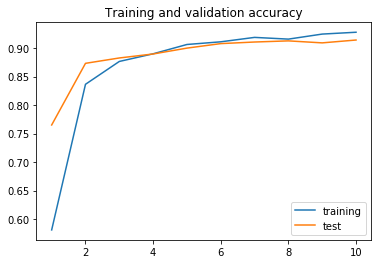

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(range(1,11),model1_training.history["acc"],label='training')
plt.plot(range(1,11),model1_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

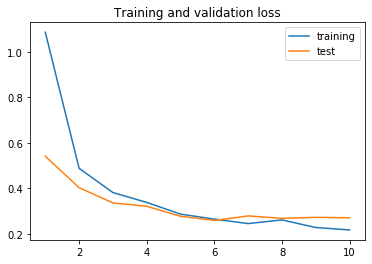

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(range(1,11),model1_training.history["loss"],label='training')
plt.plot(range(1,11),model1_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

In [29]:
score_train1 = model1.evaluate(X_train, Y_train, verbose=1)
score_test1 = model1.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 5s 508us/step


In [30]:
print(score_train1)
print(score_test1)

[0.17821863551835218, 0.9390833333333334]
[0.2714677258312702, 0.9142]


# Summary
training accuracy: 0.939
training loss: 0.178
test accuracy: 0.9142
test loss: 0.2714

# 3. Text Classification

3.1 RNN

In [31]:
from google.colab import files
uploaded = files.upload()

Saving tweets_with_labels.csv to tweets_with_labels.csv


In [0]:
import pandas as pd
import io

tweet = io.BytesIO(uploaded['tweets_with_labels.csv']) 
df = pd.read_csv(tweet,delimiter='\t')

In [0]:
df.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
from gensim.corpora import Dictionary

In [0]:
tweet = list(df['tweet'].map(lambda x:list(x)))
dct = Dictionary(tweet)
X = list(df['tweet'].map(lambda x: dct.doc2idx(list(x))))
y = df.loc[:,'k1':'k15']

In [0]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.preprocessing.text import Tokenizer, one_hot
from keras.optimizers import RMSprop
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
maxlen = 30
max_features = 15


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = sequence.pad_sequences(X_train, maxlen, padding="post", truncating="post")
X_test = sequence.pad_sequences(X_test, maxlen, padding="post", truncating="post")
X_train[0]

array([31,  6,  5, 14, 35,  6, 13,  0, 68, 10, 12, 34,  0, 17, 10,  8, 11,
        9, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [0]:
rnn = Sequential()
rnn.add(Embedding(max_features, 64))
rnn.add(SimpleRNN(32))
rnn.add(Dense(15, activation='softmax'))
rnn.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])

In [0]:
rnn_training = rnn.fit(X_train, y_train, epochs=50, batch_size=256, 
            validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54562 samples, validate on 23384 samples
Epoch 1/50





54562/54562 [==============================] - 6s 118us/step - loss: 2.6452 - acc: 0.2968 - val_loss: 2.5896 - val_acc: 0.2650
Epoch 2/50
54562/54562 [==============================] - 2s 40us/step - loss: 2.5324 - acc: 0.3329 - val_loss: 2.5711 - val_acc: 0.2813
Epoch 3/50
54562/54562 [==============================] - 2s 40us/step - loss: 2.4975 - acc: 0.3546 - val_loss: 2.5287 - val_acc: 0.3272
Epoch 4/50
54562/54562 [==============================] - 2s 39us/step - loss: 2.4786 - acc: 0.3653 - val_loss: 2.5202 - val_acc: 0.3425
Epoch 5/50
54562/54562 [==============================] - 2s 41us/step - loss: 2.4659 - acc: 0.3700 - val_loss: 2.5250 - val_acc: 0.3189
Epoch 6/50
54562/54562 [==============================] - 2s 41us/step - loss: 2.4566 - acc: 0.3736 - val_loss: 2.5126 - val_acc: 0.3468
Epoch 7/50
54562/54562 [=

<Figure size 432x288 with 0 Axes>

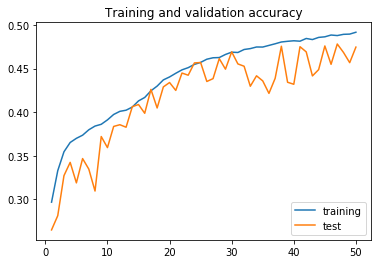

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,51),rnn_training.history["acc"],label='training')
plt.plot(range(1,51),rnn_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

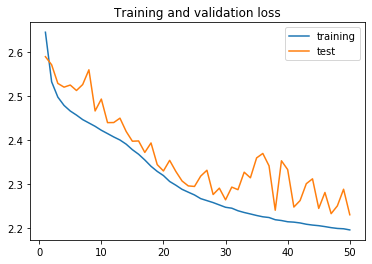

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,51),rnn_training.history["loss"],label='training')
plt.plot(range(1,51),rnn_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

3.2 CNN

In [0]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D
max_features = 15
cnn = Sequential()
cnn.add(Embedding(max_features, 64))
cnn.add(Dropout(0.25))
cnn.add(Conv1D(64, 5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(15, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['accuracy'])

cnn_training = cnn.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 54562 samples, validate on 23384 samples
Epoch 1/50
54562/54562 [==============================] - 4s 71us/step - loss: 2.5078 - acc: 0.3783 - val_loss: 2.2463 - val_acc: 0.4654
Epoch 2/50
54562/54562 [==============================] - 1s 17us/step - loss: 2.1980 - acc: 0.4904 - val_loss: 2.1446 - val_acc: 0.5078
Epoch 3/50
54562/54562 [==============================] - 1s 17us/step - loss: 2.1321 - acc: 0.5141 - val_loss: 2.1031 - val_acc: 0.5270
Epoch 4/50
54562/54562 [==============================] - 1s 16us/step - loss: 2.1024 - acc: 0.5256 - val_loss: 2.0849 - val_acc: 0.5277
Epoch 5/50
54562/54562 [==============================] - 1s 17us/step - loss: 2.0835 - acc: 0.5298 - val_loss: 2.0682 - val_acc: 0.5314
Epoch 6/50
54562/54562 [==============================] - 1s 16us/step - loss: 2.0707 - acc: 0.5339 - val_loss: 2.0568 - val_acc: 0.5385
Epoch 7/50
5

<Figure size 432x288 with 0 Axes>

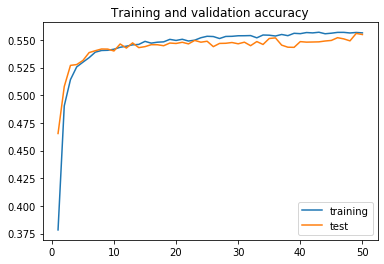

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,51),cnn_training.history["acc"],label='training')
plt.plot(range(1,51),cnn_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

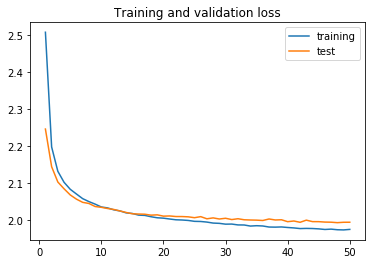

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,51),cnn_training.history["loss"],label='training')
plt.plot(range(1,51),cnn_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

3.3 Compare CNN and RNN

<Figure size 432x288 with 0 Axes>

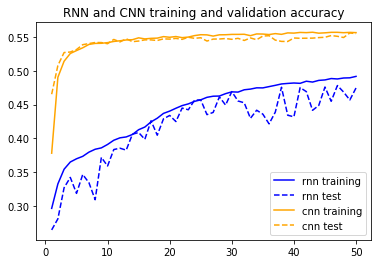

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,51),rnn_training.history["acc"],label='rnn training',color='b')
plt.plot(range(1,51),rnn_training.history['val_acc'],label='rnn test',linestyle='dashed',color='b')
plt.plot(range(1,51),cnn_training.history["acc"],label='cnn training',color='orange')
plt.plot(range(1,51),cnn_training.history['val_acc'],label='cnn test',linestyle='dashed',color='orange')
plt.legend(loc = 'best')
plt.title('RNN and CNN training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

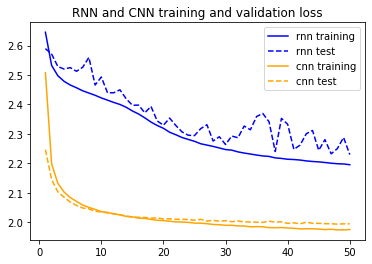

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,51),rnn_training.history["loss"],label='rnn training',color='b')
plt.plot(range(1,51),rnn_training.history['val_loss'],label='rnn test',linestyle='dashed',color='b')
plt.plot(range(1,51),cnn_training.history["loss"],label='cnn training',color='orange')
plt.plot(range(1,51),cnn_training.history['val_loss'],label='cnn test',linestyle='dashed',color='orange')
plt.legend(loc = 'best')
plt.title('RNN and CNN training and validation loss')
plt.figure()